## Deep Learning Framework for "Malaria Scanner" (3rd Place Winner at HackHouston 2019)
Project details: [DevPost Page](https://devpost.com/software/malaria-scanner)

Completed web-service: www.malariascan.com

## Team
1. Vi Ly: Deep Learning
2. Cuong Pham: Transfer Learning
3. Nguyen Phan: Web Designing

## Inspiration
The deadly disease has reached epidemic, even endemic proportions in different parts of the world — killing around 400,000 people annually. In other areas of the world, it’s virtually nonexistent. Some areas are just particularly prone to a disease outbreak — there are certain factors that make an area more likely to be infected by malaria: High poverty levels Lack of access to proper healthcare Political instability Presence of disease transmission vectors (ex. mosquitos)

## What it does
We want to create a web-based service powered that can classify accurately the skin cell with sign of Malaria.
Current diagnosing methods of this disease are tedious and time-consuming.
![Website Demo](https://challengepost-s3-challengepost.netdna-ssl.com/photos/production/software_photos/000/799/319/datas/gallery.jpg)

## How we built it
We first created a deep learning model from Keras package (with Tensorflow backend). 
The model consists of 3 convolutional layers and 2 dense layers.
We trained 13780 Malaria infected and 13780 uninfected images on our deep learning framework. 80% are used for training and 20% are used for testing. 
The best model was saved in form of an .h5 file.
![Deep Learning Network](https://challengepost-s3-challengepost.netdna-ssl.com/photos/production/software_photos/000/799/373/datas/gallery.jpg)

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
# Any results you write to the current directory are saved as output.

In [2]:
import cv2
import matplotlib.pyplot as plt 
import seaborn as sns
import os
from PIL import Image
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.utils import np_utils

Using TensorFlow backend.


In [3]:
parasitized_data = os.listdir('../input/cell_images/cell_images/Parasitized/')
print(parasitized_data[:10]) #the output we get are the .png files

uninfected_data = os.listdir('../input/cell_images/cell_images/Uninfected/')
print('\n')
print(uninfected_data[:10])

['C140P101ThinF_IMG_20151005_211735_cell_159.png', 'C175P136NThinF_IMG_20151127_142326_cell_232.png', 'C97P58ThinF_IMG_20150917_152032_cell_162.png', 'C68P29N_ThinF_IMG_20150819_133236_cell_183.png', 'C129P90ThinF_IMG_20151004_134306_cell_140.png', 'C126P87ThinF_IMG_20151004_105100_cell_129.png', 'C68P29N_ThinF_IMG_20150819_133350_cell_183.png', 'C84P45ThinF_IMG_20150818_101412_cell_98.png', 'C132P93ThinF_IMG_20151004_152353_cell_158.png', 'C80P41ThinF_IMG_20150817_111544_cell_138.png']


['C214ThinF_IMG_20151106_131748_cell_148.png', 'C188P149ThinF_IMG_20151203_134419_cell_40.png', 'C158P119ThinF_IMG_20151115_181558_cell_45.png', 'C100P61ThinF_IMG_20150918_145042_cell_59.png', 'C114P75ThinF_IMG_20150930_150733_cell_19.png', 'C201ThinF_IMG_20150930_143502_cell_186.png', 'C224ThinF_IMG_20151112_111955_cell_121.png', 'C96P57ThinF_IMG_20150824_112442_cell_163.png', 'C162P123ThinF_IMG_20151116_104114_cell_27.png', 'C157P118ThinF_IMG_20151115_163611_cell_9.png']


**DATA VISUALIZATION**[](http://)

**1. PARASITIZED DATA**

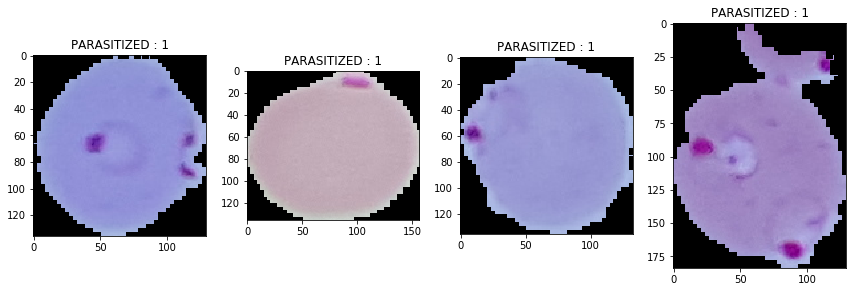

In [4]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread('../input/cell_images/cell_images/Parasitized' + "/" + parasitized_data[i])
    plt.imshow(img)
    plt.title('PARASITIZED : 1')
    plt.tight_layout()
plt.show()

**2. UNINFECTTED DATA**

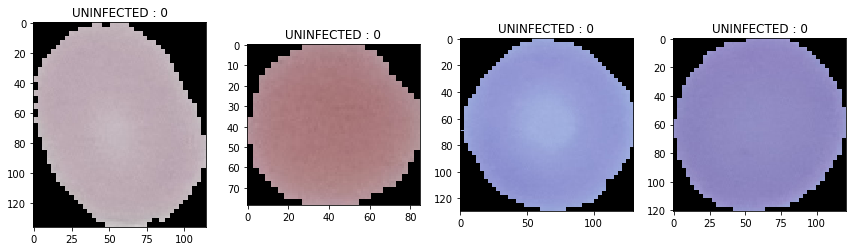

In [5]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread('../input/cell_images/cell_images/Uninfected' + "/" + uninfected_data[i+1])
    plt.imshow(img)
    plt.title('UNINFECTED : 0')
    plt.tight_layout()
plt.show()

**One can clearly see the difference between the infected and uninfected. You can observe a small clot inside the cellular image for infected while for the uninfected the cellular image is clean without any clots.**

In [6]:
data = []
labels = []
for img in parasitized_data:
    try:
        img_read = plt.imread('../input/cell_images/cell_images/Parasitized/' + "/" + img)
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(1)
    except:
        None
        
for img in uninfected_data:
    try:
        img_read = plt.imread('../input/cell_images/cell_images/Uninfected' + "/" + img)
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(0)
    except:
        None

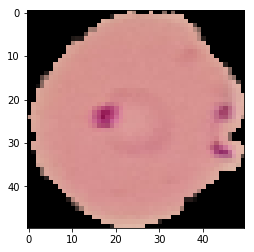

In [7]:
plt.imshow(data[0])
plt.show()

In [8]:
image_data = np.array(data)
labels = np.array(labels)

In [9]:
idx = np.arange(image_data.shape[0])
np.random.shuffle(idx)
image_data = image_data[idx]
labels = labels[idx]

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(image_data, labels, test_size = 0.2, random_state = 101)

In [11]:
y_train = np_utils.to_categorical(y_train, num_classes = 2)
y_test = np_utils.to_categorical(y_test, num_classes = 2)

In [12]:
print(f'SHAPE OF TRAINING IMAGE DATA : {x_train.shape}')
print(f'SHAPE OF TESTING IMAGE DATA : {x_test.shape}')
print(f'SHAPE OF TRAINING LABELS : {y_train.shape}')
print(f'SHAPE OF TESTING LABELS : {y_test.shape}')

SHAPE OF TRAINING IMAGE DATA : (22046, 50, 50, 3)
SHAPE OF TESTING IMAGE DATA : (5512, 50, 50, 3)
SHAPE OF TRAINING LABELS : (22046, 2)
SHAPE OF TESTING LABELS : (5512, 2)


* **BUILDING THE CNN MODEL (without data augmentation)**

In [13]:
import keras
from keras.layers import Dense, Conv2D
from keras.layers import Flatten
from keras.layers import MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.models import Sequential
from keras import backend as K

from keras import optimizers

In [14]:
def CNNbuild(height, width, classes, channels):
    model = Sequential()
    
    inputShape = (height, width, channels)
    chanDim = -1
    
    if K.image_data_format() == 'channels_first':
        inputShape = (channels, height, width)
    model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = inputShape))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Conv2D(32, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Conv2D(32, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Flatten())
    
    model.add(Dense(512, activation = 'relu'))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.5))
    model.add(Dense(classes, activation = 'softmax'))
    
    return model

In [15]:
#instantiate the model
height = 50
width = 50
classes = 2
channels = 3
model = CNNbuild(height = height, width = width, classes = classes, channels = channels)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 11, 11, 32)        128       
__________

In [16]:
#compile the model
model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [17]:
#fit the model onto the dataset
h = model.fit(x_train, y_train, epochs = 20, batch_size = 32)

Epoch 1/20
22046/22046 [==============================] - 13s 594us/step - loss: 0.5573 - acc: 0.7584
Epoch 2/20
22046/22046 [==============================] - 9s 420us/step - loss: 0.2161 - acc: 0.9228
Epoch 3/20
22046/22046 [==============================] - 9s 418us/step - loss: 0.1892 - acc: 0.9358
Epoch 4/20
22046/22046 [==============================] - 9s 419us/step - loss: 0.1723 - acc: 0.9426
Epoch 5/20
22046/22046 [==============================] - 9s 419us/step - loss: 0.1646 - acc: 0.9449
Epoch 6/20
22046/22046 [==============================] - 9s 421us/step - loss: 0.1643 - acc: 0.9455
Epoch 7/20
22046/22046 [==============================] - 9s 419us/step - loss: 0.1589 - acc: 0.9482
Epoch 8/20
22046/22046 [==============================] - 9s 419us/step - loss: 0.1540 - acc: 0.9503
Epoch 9/20
22046/22046 [==============================] - 9s 418us/step - loss: 0.1521 - acc: 0.9517
Epoch 10/20
22046/22046 [==============================] - 9s 418us/step - loss: 0.1495 - 

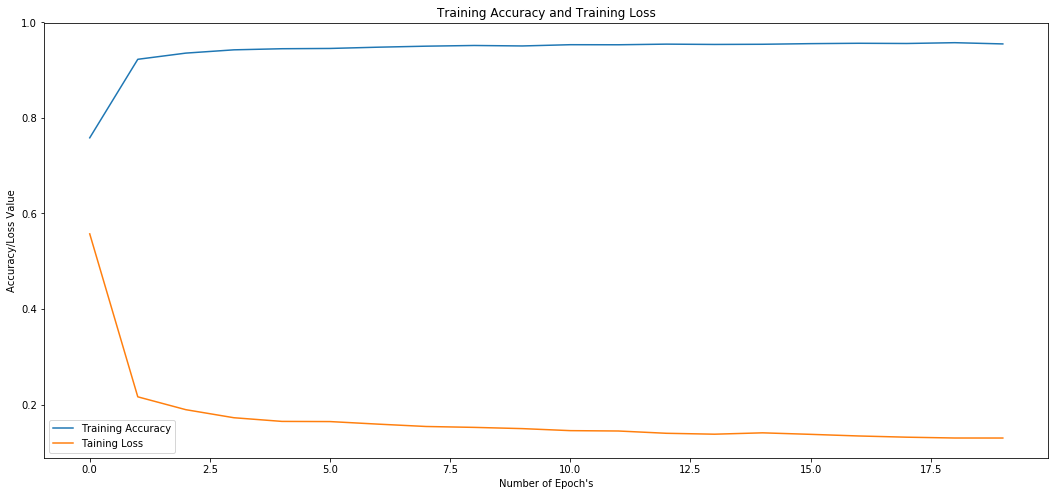

In [18]:
plt.figure(figsize = (18,8))
plt.plot(range(20), h.history['acc'], label = 'Training Accuracy')
plt.plot(range(20), h.history['loss'], label = 'Taining Loss')
#ax1.set_xticks(np.arange(0, 31, 5))
plt.xlabel("Number of Epoch's")
plt.ylabel('Accuracy/Loss Value')
plt.title('Training Accuracy and Training Loss')
plt.legend(loc = "best")

# ax2.plot(range(20), h.history['loss'], label = 'Training Loss')
# ax2.plot(range(20), h.history['val_loss'], label = 'Validation Loss')
# #ax2.set_xticks(np.arange(0, 31, 5))
# ax2.set_xlabel("Number of Epoch's")
# ax2.set_ylabel('Loss Value')
# ax2.set_title('Training Loss vs Validation Loss')
# ax2.legend(loc = "best")

In [19]:
#evaluate the model on test data
predictions = model.evaluate(x_test, y_test)

5512/5512 [==============================] - 1s 161us/step


In [20]:
print(f'LOSS : {predictions[0]}')
print(f'ACCURACY : {predictions[1]}')

LOSS : 0.12909660784660126
ACCURACY : 0.9551886792452831


**The performance of the model on the test data seems to fairly good with 95.77% accuracy.**